# Exploratory Data Analysis (EDA) on Netflix Movies Dataset

This project performs Exploratory Data Analysis (EDA) on the Netflix Movies and TV Shows dataset using Python. The goal is to uncover meaningful insights about the content available on Netflix, such as trends in release years, genre distribution, country-wise content availability, and more.

**Objectives:**

1.Understand the structure and features of the dataset

2.Clean and preprocess the data for analysis

3.Visualize patterns and trends in Netflix content

4.Identify key insights such as:

5.Most common genres

6.Yearly content release trends

7.Country-wise distribution

8.Movie vs TV show comparison

9.Duration analysis

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df = pd.read_csv('C:/Users/HP/Downloads/archive (8)/netflix_titles.csv') 

In [6]:
print(df)

     show_id     type                  title         director  \
0         s1    Movie   Dick Johnson Is Dead  Kirsten Johnson   
1         s2  TV Show          Blood & Water              NaN   
2         s3  TV Show              Ganglands  Julien Leclercq   
3         s4  TV Show  Jailbirds New Orleans              NaN   
4         s5  TV Show           Kota Factory              NaN   
...      ...      ...                    ...              ...   
8802   s8803    Movie                 Zodiac    David Fincher   
8803   s8804  TV Show            Zombie Dumb              NaN   
8804   s8805    Movie             Zombieland  Ruben Fleischer   
8805   s8806    Movie                   Zoom     Peter Hewitt   
8806   s8807    Movie                 Zubaan      Mozez Singh   

                                                   cast        country  \
0                                                   NaN  United States   
1     Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...   South Africa 

In [7]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [8]:
df.tail()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."
8806,s8807,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [10]:
df.describe()

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


In [11]:
pd.set_option('display.max_columns', None)

In [12]:
pd.set_option('display.max_rows', None) 

In [13]:
# Set plot style
sns.set(style='whitegrid')
plt.rcParams['figure.figsize'] = (10, 6)

# Data Cleaning

Check for missing values

In [15]:
print("Missing Values:\n", df.isnull().sum())

Missing Values:
 show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64


In [16]:
df['country'].fillna('Unknown', inplace=True)
df['director'].fillna('Unknown', inplace=True)
df['cast'].fillna('Unknown', inplace=True)
df['rating'].fillna('Not Rated', inplace=True)
df['date_added'] = pd.to_datetime(df['date_added'])
df.dropna(subset=['title'], inplace=True)

In [17]:
df['year_added'] = df['date_added'].dt.year
df['month_added'] = df['date_added'].dt.month
df['duration_int'] = df['duration'].str.extract('(\d+)').astype(float)
df['duration_type'] = df['duration'].str.extract('([a-zA-Z]+)')

# Print cleaned data summary

In [18]:
print("Cleaned Data Overview:\n", df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   show_id        8807 non-null   object        
 1   type           8807 non-null   object        
 2   title          8807 non-null   object        
 3   director       8807 non-null   object        
 4   cast           8807 non-null   object        
 5   country        8807 non-null   object        
 6   date_added     8797 non-null   datetime64[ns]
 7   release_year   8807 non-null   int64         
 8   rating         8807 non-null   object        
 9   duration       8804 non-null   object        
 10  listed_in      8807 non-null   object        
 11  description    8807 non-null   object        
 12  year_added     8797 non-null   float64       
 13  month_added    8797 non-null   float64       
 14  duration_int   8804 non-null   float64       
 15  duration_type  8804 n

# Visualizations of Patterns & Trends

**Content Type Distribution**

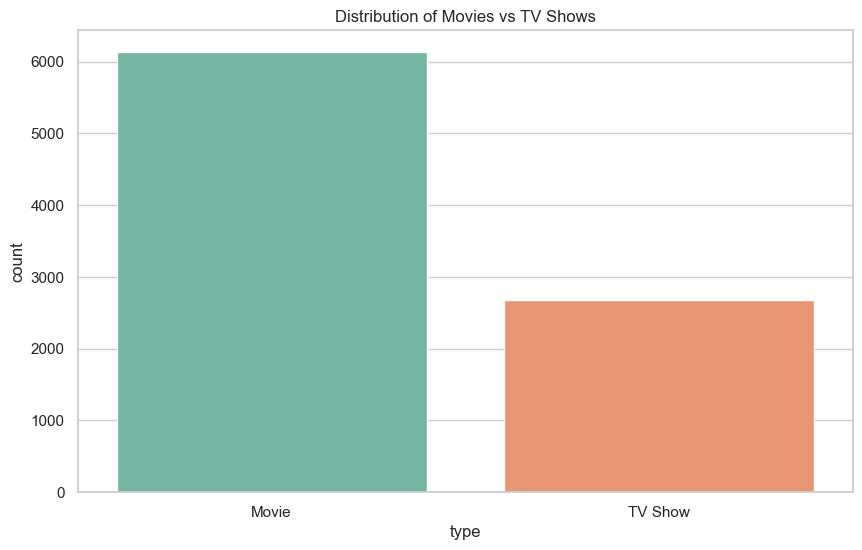

In [19]:
sns.countplot(data=df, x='type', palette='Set2')
plt.title('Distribution of Movies vs TV Shows')
plt.show()

**Top Content-Producing Countries**

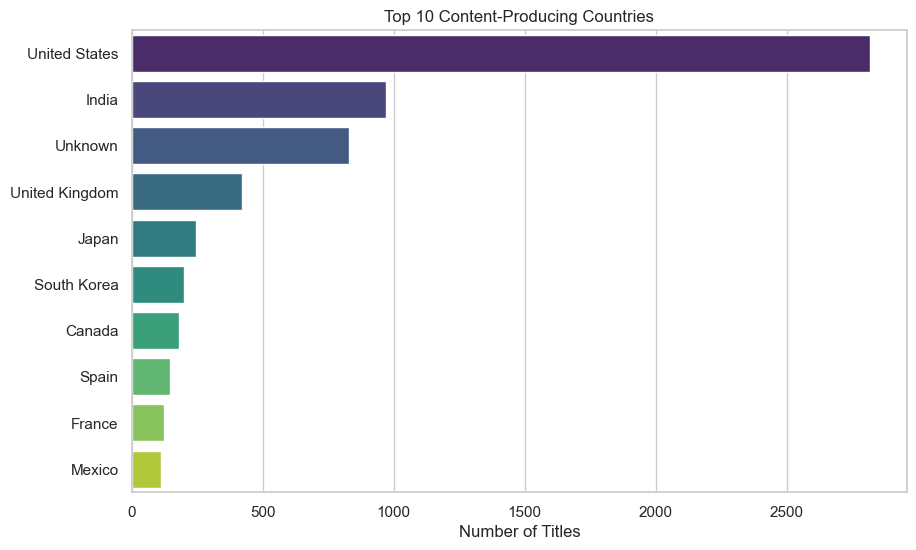

In [20]:
top_countries = df['country'].value_counts().head(10)
sns.barplot(x=top_countries.values, y=top_countries.index, palette='viridis')
plt.title('Top 10 Content-Producing Countries')
plt.xlabel('Number of Titles')
plt.show()

**Content Added Over Time**

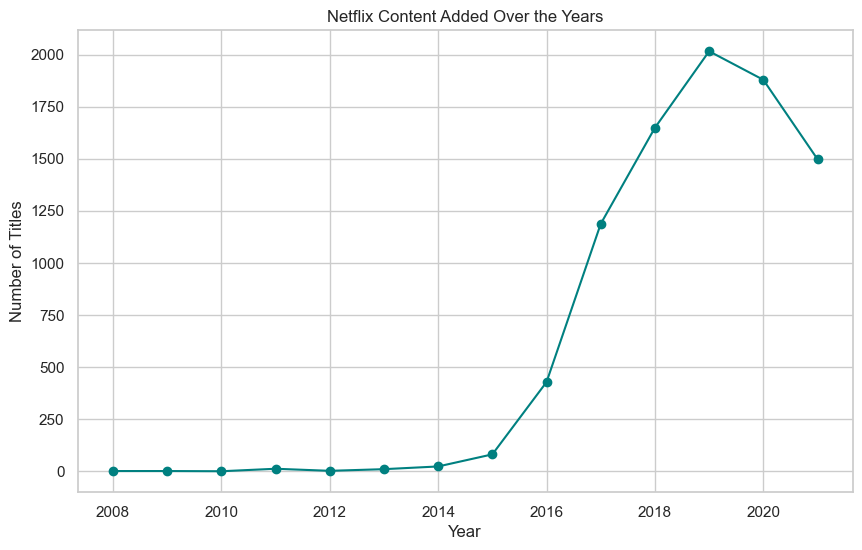

In [21]:
df['year_added'].value_counts().sort_index().plot(kind='line', marker='o', color='teal')
plt.title('Netflix Content Added Over the Years')
plt.xlabel('Year')
plt.ylabel('Number of Titles')
plt.show()

Most Popular Genres

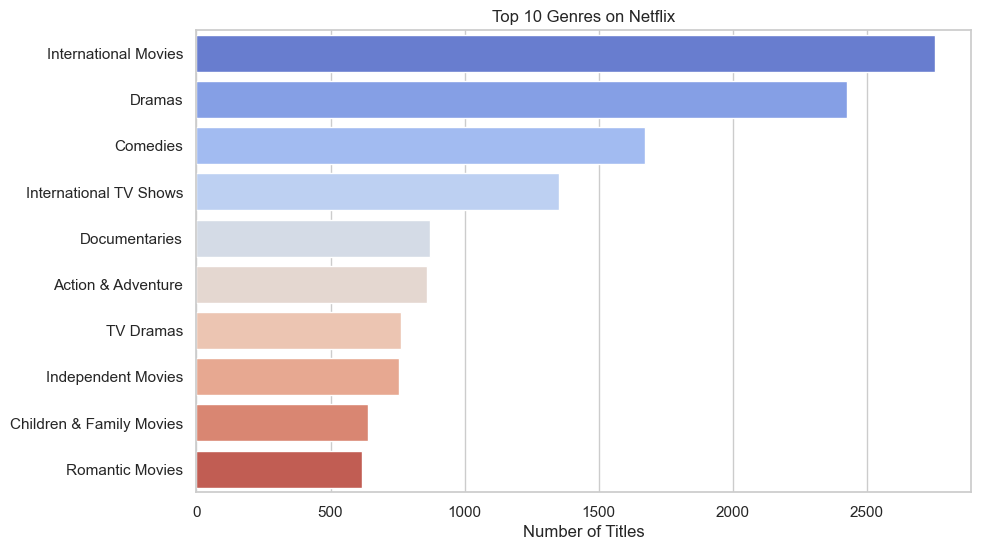

In [22]:
genres = df['listed_in'].str.split(',').explode().str.strip()
top_genres = genres.value_counts().head(10)
sns.barplot(x=top_genres.values, y=top_genres.index, palette='coolwarm')
plt.title('Top 10 Genres on Netflix')
plt.xlabel('Number of Titles')
plt.show()

**Movie Duration Distribution**

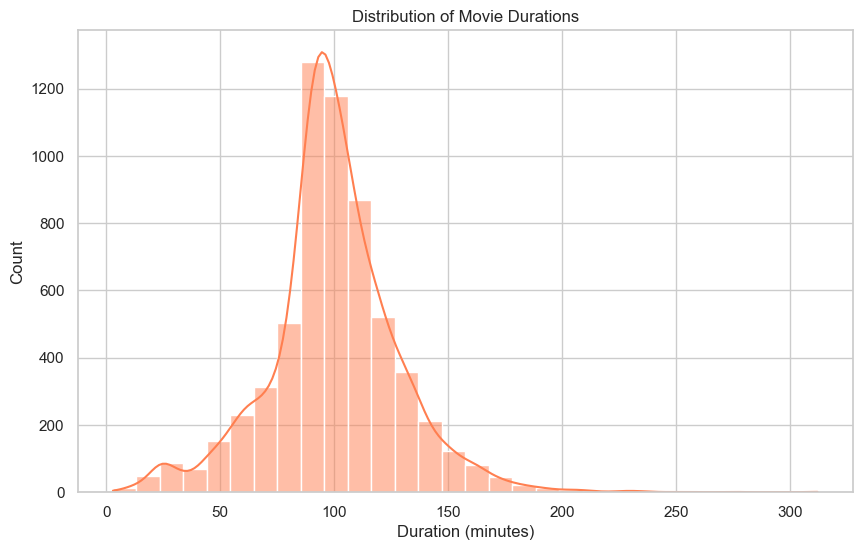

In [23]:
movies = df[df['type'] == 'Movie']
sns.histplot(movies['duration_int'], bins=30, kde=True, color='coral')
plt.title('Distribution of Movie Durations')
plt.xlabel('Duration (minutes)')
plt.show()

**Top Directors**

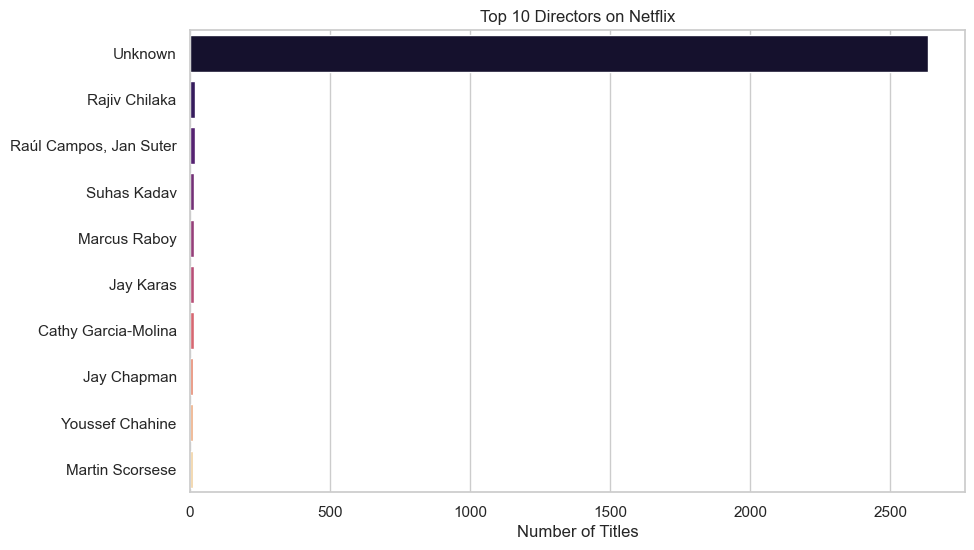

In [24]:
top_directors = df['director'].value_counts().head(10)
sns.barplot(x=top_directors.values, y=top_directors.index, palette='magma')
plt.title('Top 10 Directors on Netflix')
plt.xlabel('Number of Titles')
plt.show()

**Word Cloud of Titles**

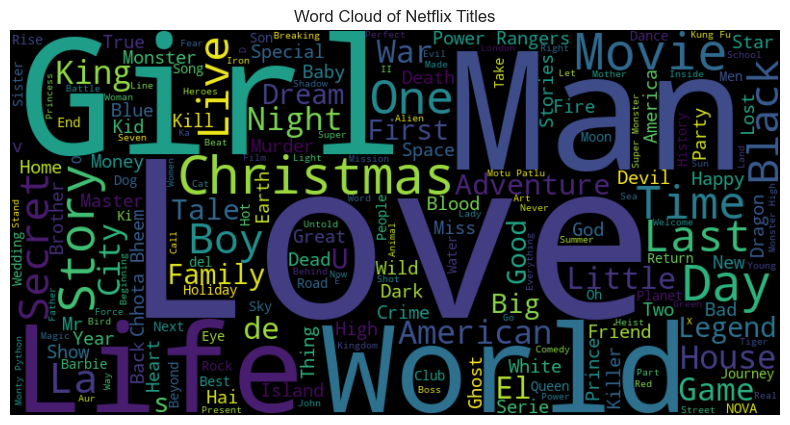

In [30]:
from wordcloud import WordCloud
text = ' '.join(df['title'].dropna())
wordcloud = WordCloud(width=800, height=400, background_color='black').generate(text)

plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Netflix Titles')
plt.show()

In [29]:
!pip install wordcloud

     -------------------------------------- 299.8/299.8 kB 4.6 MB/s eta 0:00:00


# Summary Report of Insights

In [33]:
print("**Summary Report of Insights:**")
print("""
1. Content Type:
   - Netflix hosts more Movies (~70%) than TV Shows (~30%).

2. Country Distribution:
   - USA, India, UK are the top content producers.
   - Many titles have 'Unknown' country, indicating missing metadata.

3. Genre Trends:
   - Drama, International, and Documentaries are the most frequent genres.
   - Genre diversity is high due to multi-genre tagging.

4. Growth Over Time:
   - Netflix's content library grew rapidly post-2015.
   - Peak additions occurred around 2019–2020.

5. Duration Analysis:
   - Most movies range between 60–120 minutes.
   - TV Shows are tagged with 'Seasons' instead of minutes.

6. Director Insights:
   - A few directors have directed multiple titles, but most are unique.

7. Title Trends:
   - Word cloud reveals common themes like "Love", "Story", "Life", "World".
""")


**Summary Report of Insights:**

1. Content Type:
   - Netflix hosts more Movies (~70%) than TV Shows (~30%).

2. Country Distribution:
   - USA, India, UK are the top content producers.
   - Many titles have 'Unknown' country, indicating missing metadata.

3. Genre Trends:
   - Drama, International, and Documentaries are the most frequent genres.
   - Genre diversity is high due to multi-genre tagging.

4. Growth Over Time:
   - Netflix's content library grew rapidly post-2015.
   - Peak additions occurred around 2019–2020.

5. Duration Analysis:
   - Most movies range between 60–120 minutes.
   - TV Shows are tagged with 'Seasons' instead of minutes.

6. Director Insights:
   - A few directors have directed multiple titles, but most are unique.

7. Title Trends:
   - Word cloud reveals common themes like "Love", "Story", "Life", "World".

